# Linear Predictive analysis
---
Roll Number: 213070018

Name: Harsh Diwakar

---

##Import libraries and Download Data

In [105]:
import numpy as np
from scipy.io.wavfile import read
from matplotlib import pyplot as plt
from scipy.signal import tf2zpk
from scipy.io.wavfile import write
!gdown --id 1TzUu1zYsmnxRvI4DnnDitRMf1DmLBadx

Downloading...
From: https://drive.google.com/uc?id=1TzUu1zYsmnxRvI4DnnDitRMf1DmLBadx
To: /content/aa.wav
100% 1.48k/1.48k [00:00<00:00, 1.32MB/s]


## 1) Pre- Emphasis 



In [106]:
# Read wav file
sr, x_n = read('/content/aa.wav')
# Pre Emphasize with a filter of 1- 0.95*z^-1
# Difference Equation: 
y_n = np.zeros(x_n.shape)
y_n[0] = x_n[0]
for i in range(1,x_n.shape[0]): 
  y_n[i] = x_n[i]-0.95*x_n[i-1]


### Visualizing both spectrum

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 5.0 ms')

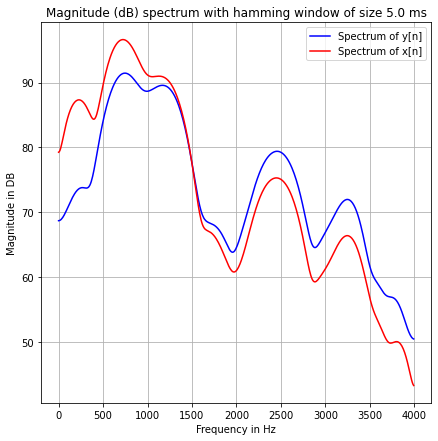

In [107]:
window_size = 0.005
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
V_n_y = y_n[center:center+window.shape[0]]* window
V_n_x = x_n[center:center+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k_y = np.fft.fft(V_n_y, n=dft_len)
V_k_x = np.fft.fft(V_n_x, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k_y.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk_y = 20*np.log10(np.abs(V_k_y))
mag_vk_x = 20*np.log10(np.abs(V_k_x))
plt.plot(freq[0:zerro],mag_vk_y[0:zerro],'b',label = 'Spectrum of y[n]')
plt.plot(freq[0:zerro],mag_vk_x[0:zerro],'r',label = 'Spectrum of x[n]')
plt.legend()
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(window_size*1000))

Here we observe that after pre-emphasising the signal, spectral tilt is boosted that is slantness is reduced.

##2) Narrowband magnitude spectrum

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 30.0 ms')

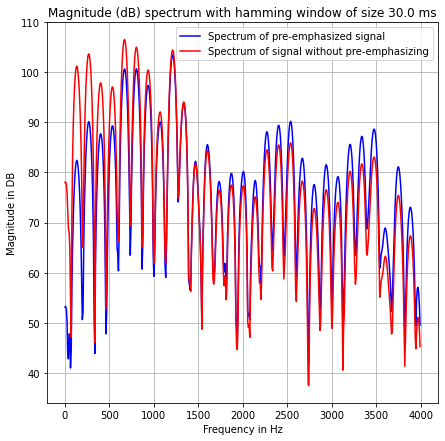

In [108]:
window_size = 0.03
Fs = sr
window_len = int(window_size*Fs)
window= np.hamming(window_len)
center = y_n.shape[0]//2 
V_n_y = y_n[center:center+window.shape[0]]* window
V_n_x = x_n[center:center+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k_y = np.fft.fft(V_n_y, n=dft_len)
V_k_x = np.fft.fft(V_n_x, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k_y.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk_y = 20*np.log10(np.abs(V_k_y))
mag_vk_x = 20*np.log10(np.abs(V_k_x))
plt.plot(freq[0:zerro],mag_vk_y[0:zerro],'b',label = 'Spectrum of pre-emphasized signal')
plt.plot(freq[0:zerro],mag_vk_x[0:zerro],'r',label = 'Spectrum of signal without pre-emphasizing')
plt.legend()
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(window_size*1000))

We remove the glottal shaping and radiation by passing the filter through a one zero filter with a zero at location 0.95. Here we can observe that the spectrum of pre-emphasized signal is boosted from and the magnitude at higher frequencies is increased as compared to original signal.

This pre-emphasis helps our all pole modelling with LP analyis. There might be poles that are wasted for just capturing the glottal shaping and radiation using two poles, so we remove that possibility by pre-emphasizing the signal

##3) Levinson- Durbin recursion

### Function for Autocorrelation

In [109]:
def autocorr(x):
  r = np.zeros(x.shape)
  N = x.shape[0]
  for i in range(x.shape[0]):
    x_t = np.zeros(x.shape)
    x_t[i:] = x[:N-i]
    r[i] = np.dot(x,x_t.T)
  return(r)

### Recursion

LP Coefficients for order p=2: 
 [ 0.93133242 -0.53925298]
LP Coefficients for order p=4: 
 [ 0.6871401  -0.28199187 -0.17275402 -0.2055609 ]
LP Coefficients for order p=6: 
 [ 0.71295025 -0.28421957 -0.1561982  -0.28847369  0.14255291 -0.06844695]
LP Coefficients for order p=8: 
 [ 0.58329635 -0.21400761 -0.16121663 -0.50834496 -0.03932595 -0.08073617
  0.21894354 -0.59313464]
LP Coefficients for order p=10: 
 [ 0.68824994 -0.19517577 -0.16816064 -0.49588686  0.06074323 -0.00194448
  0.27663989 -0.69143195  0.14488429  0.09026391]
LP Coefficients for order p=40: 
 [ 0.67690291 -0.31373911  0.04104147 -0.65086097  0.11390968 -0.19509123
  0.38534818 -0.78652942  0.192224   -0.06161661  0.02305001 -0.13871671
 -0.00415035 -0.170451   -0.0396626  -0.18888708 -0.02289174 -0.12070048
  0.05331515 -0.27171785  0.11394568 -0.29431386  0.06377786 -0.10290298
  0.26805593 -0.34833974  0.1019719  -0.0556621   0.06998938  0.02110943
 -0.23782693  0.13114728 -0.03394207  0.1460431  -0.1700095   0

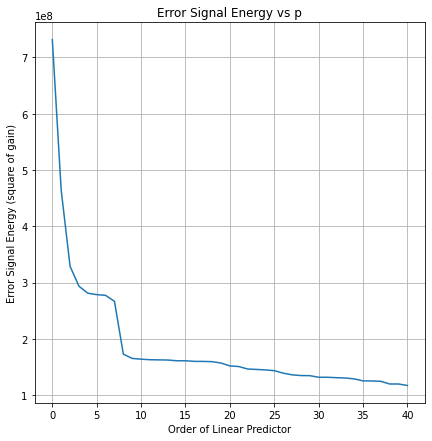

In [110]:
# Orders p
P = np.array([2,4,6,8,10,40])
# Errors
Errors = []
# List to store coefficients
LP_coef = []
r = autocorr(V_n_y)
for p in P:
  # Error E
  E = np.zeros(p)
  # LP Coefficients a and a[i-1] as a_1
  a = np.zeros(p)
  a_1 = np.zeros(p)
  E[0] = r[0]
  # Reflection Coefficient k:
  k = r[1]/E[0]
  a[0] = k
  # Append Error:
  if p==P[-1]:
    Errors.append(E[0])
  for i in range(1,p):
    a_1 = a.copy()
    # Update error
    E[i] = (1-np.square(k))*E[i-1]
    
    # Update Reflection Coefficient
    k=0
    for j in range(i):
      k += a_1[j]*r[i-j]
    k = (r[i+1]- k)/ E[i]

    # Update Coefficients
    a[i] = k
    for j in range(i):
      a[j] = a_1[j] - k*a_1[i-j-1]
    # Append the errors:
    if (p==P[-1]):
      Errors.append(E[i])

  # Append coefficients and Errors
  LP_coef.append(a)
  if (p==P[-1]):
      Errors.append((1-np.square(k))*E[i])
  
  
# Print Coefficient:
for i in range(P.shape[0]):
  print('LP Coefficients for order p={}: \n {}'.format(P[i],LP_coef[i]))

plt.plot(np.arange(0,P[-1]+1,1), Errors)
plt.xlabel('Order of Linear Predictor')
plt.ylabel('Error Signal Energy (square of gain)')
plt.title('Error Signal Energy vs p')
plt.grid()

print('\n')
for p in P:
  print('Error for {}th order LP coefficients is: {}'.format(p,Errors[p]))

Here we observe that error is decreasing as the order, p increases. However, after a certain value of p (8-9 in this case) there is not any significant improvement in error energy.

### LP Coefficients by Matrix Inversion

In [111]:
# Toplitz matrix:
toplitz = np.zeros((p,p))
for i in range(p):
  toplitz[i,i:] = r[:p-i]
toplitz = np.triu(toplitz) + np.triu(toplitz, -1).T-np.diag(np.diag(toplitz))
# r_bar:
b = r[1:p+1]
# Coeficient A = R_bar^-1.r_bar
A =np.dot(np.linalg.inv(toplitz),b)
# Print Difference between two LP coefficients
print('Difference Between Coefficients found by two methods: \n',A- LP_coef[-1])

Difference Between Coefficients found by two methods: 
 [ 1.99840144e-15 -2.49800181e-15  2.22044605e-15 -2.88657986e-15
  4.87110352e-15 -3.35842465e-15  1.11022302e-15 -5.44009282e-15
  5.80091530e-15 -3.77475828e-15  1.17267307e-15 -9.38138456e-15
  4.11129464e-15 -3.46944695e-15  1.08940634e-15 -6.46704912e-15
 -8.98586761e-16 -2.63677968e-15  5.68989300e-16 -3.77475828e-15
 -1.69309011e-15 -9.43689571e-16 -2.58126853e-15 -1.24900090e-16
 -2.33146835e-15 -6.66133815e-16 -4.57966998e-16 -4.99600361e-16
 -3.17801341e-15 -8.56953397e-16 -1.94289029e-16  6.10622664e-16
 -1.98452366e-15 -1.44328993e-15  4.71844785e-16  1.66533454e-16
 -4.99600361e-16 -2.77555756e-17 -1.90125693e-15  1.13797860e-15]


Here, I have found the LP Coefficients by using Inversion of Toplitz matrix just to check if the coefficients found using Lavinson- Durbin recursion are correct or not. As we observe that difference between both the coefficients is in the order of $10^{-15}$  hence both coefficients are same.

## 4) Pole-Zero Plots for p=6,10

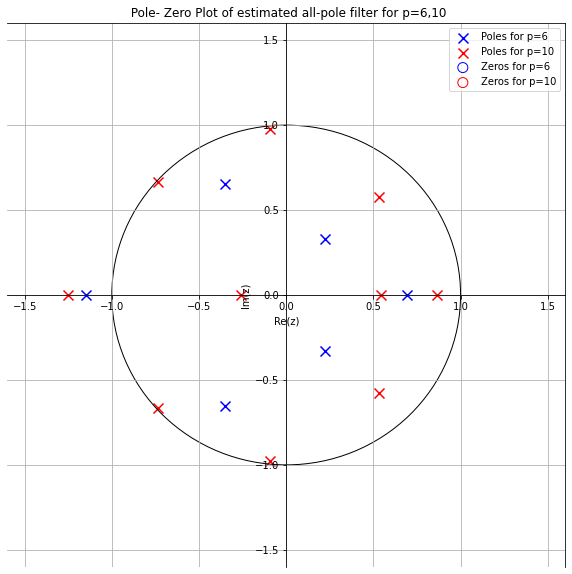

In [112]:
# For p=6
a_6 = LP_coef[2]
# For p=10
a_10 = LP_coef[4]

# tf2zpk: Gives zeros, poles and gain
Num_coef = 1
Den_coef = np.ones(a_6.shape[0]+1)
Den_coef[1:] = a_6
zeros_6, poles_6, k_6 = tf2zpk(Num_coef, Den_coef)

Den_coef = np.ones(a_10.shape[0]+1)
Den_coef[1:] = a_10
zeros_10, poles_10, k_10 = tf2zpk(Num_coef, Den_coef)
# Plot Pole zero
# Plot Unit Circle:
circle = plt.Circle((0,0),1,fill = False)
ax= plt.gca()
ax.set_xlim((-1.6, 1.6))
ax.set_ylim((-1.6, 1.6))
ax.add_patch(circle)
# Add Poles:
x = np.real(poles_6)
y = np.imag(poles_6)
plt.scatter(x,y,marker = 'x', color = 'b',s = 100, label = 'Poles for p=6')

x = np.real(poles_10)
y = np.imag(poles_10)
plt.scatter(x,y,marker = 'x', color = 'r',s = 100, label = 'Poles for p=10')
# Add Zeros:
x = np.real(zeros_6)
y = np.imag(zeros_6)
plt.scatter(x,y,marker= 'o',facecolors='none', edgecolors = 'b', s= 100, label = 'Zeros for p=6')

x = np.real(zeros_10)
y = np.imag(zeros_10)
plt.scatter(x,y,marker= 'o',facecolors='none', edgecolors = 'r', s= 100, label = 'Zeros for p=10')
# Add Axis
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.rcParams["figure.figsize"] = (7,7)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(' Pole- Zero Plot of estimated all-pole filter for p=6,10')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
plt.legend()

Above Pole zero plot of estimated all-pole filter for p=6 and 10 is shown. p=6 with blue cross and p=10 with red crosses. For p = 6, we have 2 real poles and 4 complex conjugate poles. Similarly, for p= 10, we have 4 poles real poles and 6 complex conjugate poles. If we relate complex conjugate poles to the formants, then we can say that 6th order coefficients are capturing two formant frequencies whereas, 10th order coefficients are capturing 3 formant frequencies so, in a way 10th order representation is better than 6th order. This can also be observed from the error energy signal.

##5) LPC Spectrum Magnitude

We know, that the gain for is nothing but the square root of minimum error signal energy that we have already calculated and found out to be:
<ul type = "none">
<li>18134 for p = 2</li>
<li>16766 for p = 4</li>
<li>16652 for p = 6</li>
<li>13146 for p = 8</li>
<li>12804 for p = 10</li>
<li>10827 for p = 40</li>

</ul> 

### Magnitude Spectrum

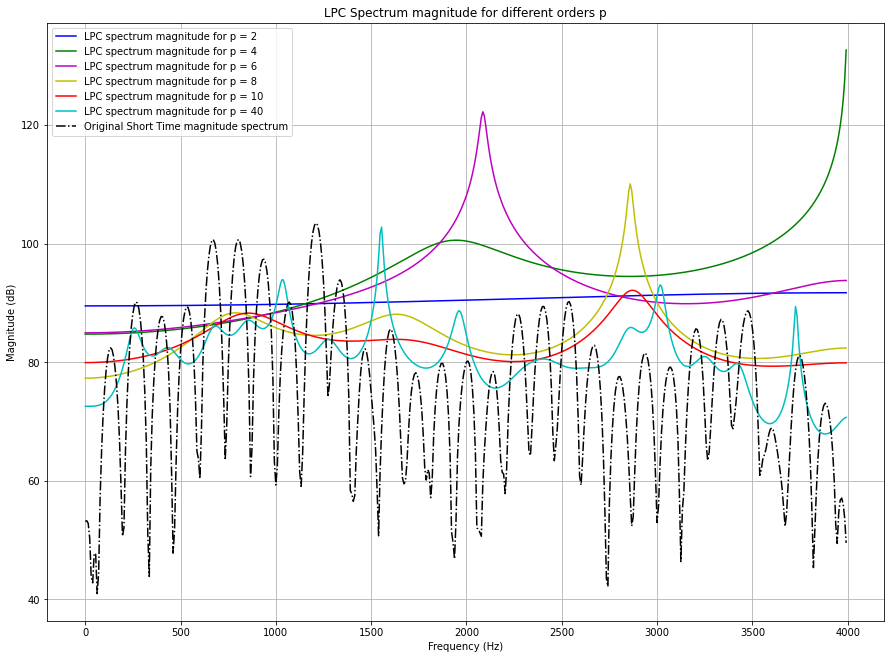

In [113]:
colors = {2: 'b', 4: 'g', 6: 'm', 8: 'y', 10: 'r', P[-1]:'c'}
index_E = np.zeros(6,int)
index_E[:5] = np.arange(2,11,2)
index_E[5] = P[-1]
Errors = np.array(Errors)
G = np.sqrt(Errors[index_E])
f = freq[0:zerro]
w = 2*np.pi*f/Fs
mag_orig = mag_vk_y[0:zerro]
z = np.exp(-1j*w)
mag_db_P = []
for i in range(P.shape[0]):
  poles = LP_coef[i]
  Den = 1
  for j in range(len(poles)):
    Den -= poles[j]*z**j
  mag_db = 20*np.log10(np.abs(G[i]/Den))
  mag_db_P.append(mag_db)
  plt.plot(f,mag_db,colors[P[i]],label = 'LPC spectrum magnitude for p = {}'.format(P[i]))

plt.plot(f,mag_orig,'k-.',label='Original Short Time magnitude spectrum' )
plt.legend()
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.title('LPC Spectrum magnitude for different orders p')
fig = plt.gcf()
fig.set_size_inches(15, 11)
plt.grid('on')



### Finding the formant locations

In [114]:
def freq_dft(freq, dft_len = 1024, Fs = 8000):
  step = Fs/dft_len
  return (int(round(freq/step)))

mag_vk = mag_db_P[3]
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k+f1]

f1 = freq_dft(1000)
f2 = freq_dft(2000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

f1 = freq_dft(2200)
f2 = freq_dft(3000)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

print('Formants obtained using 8th order LP coefficients: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

mag_vk = mag_db_P[4]
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k+f1]

f1 = freq_dft(1300)
f2 = freq_dft(2000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

f1 = freq_dft(2200)
f2 = freq_dft(3000)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

print('Formants obtained using 10th order LP coefficients: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))


mag_vk = mag_vk_y
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k+f1]

f1 = freq_dft(1300)
f2 = freq_dft(2000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

f1 = freq_dft(2200)
f2 = freq_dft(3000)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

print('Formants obtained using STFT with window size of 5ms: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using 8th order LP coefficients: 
 First Formant: 789.0625 Hz 
 Second Formant: 1632.8125 Hz 
 Third Formant: 2859.375 Hz
Formants obtained using 10th order LP coefficients: 
 First Formant: 859.375 Hz 
 Second Formant: 1625.0 Hz 
 Third Formant: 2875.0 Hz
Formants obtained using STFT with window size of 5ms: 
 First Formant: 804.6875 Hz 
 Second Formant: 1335.9375 Hz 
 Third Formant: 2539.0625 Hz


Observations:

- For p = 2 we see that a straight line is trying to fit the original short-time magnitude spectrum and as the order p is increasing the LP spectrum approaches the original spectrum.
- When order is low ($p   \epsilon {2,4,6,8,10}$), only the prominent peaks are taken into account that is the formant envolope.
- As the order increases (p = 40), other other anomilities such as harmonics are also taken into consideration.
- Error is decreasing as the order is increasing because higher order LP Coefficients are trying to approach the original spectrum even by taking the harmonics into consideration. If we have a large enough order LP coefficients, it would be able to replicate the exact the original spectrum.
- We also observe that error( Difference between original spectrum and LP spectrum) is higher at peaks of original spectra and low at lower peaks as explained in the class.
- We can also observe for p = 8 and 10 the formant locations of vowel /a/ are at the locations near to the theorical formant locations (F1 = 760 Hz, F2 = 1320 Hz and F3 = 2500 Hz). Whereas for the 8th order coefficients: (F1 = 789 Hz, F2 = 1632 Hz and F3 = 2859 Hz) and for 10th order coefficients: (F1 = 859 Hz, F2 = 1625 Hz and F3 = 2875 Hz). Where F1, F2 and F3 are first, second and third formant frequencies respectively. 



## 6) Inverse Filtering

For 10th order LP Model We will find the residual error signal by using inverse filtering by Difference Equation method:

$e[n] = s[n] -  \sum_{k=1}^{p} a_n s[n-k] $


Text(0.5, 1.0, 'Magnitude (dB) spectrum of residual error signal')

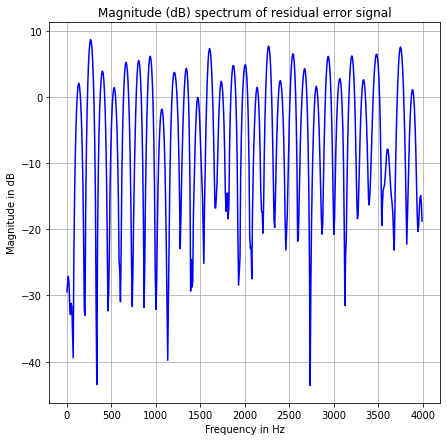

In [115]:
a_10 = LP_coef[4]
G_10 = np.sqrt(Errors[10])

s_n = V_n_y
e = np.zeros(s_n.shape)

for n in range(s_n.shape[0]):
  e[n] = s_n[n]
  for k in range(1,11):
    if (n-k>0):
      e[n] -= a_10[k-1]*s_n[n-k]
e = e/G_10

E_k = np.fft.fft(e, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(E_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_E_k = 20*np.log10(np.abs(E_k))
plt.plot(freq[0:zerro],mag_E_k[0:zerro],'b',label = 'Spectrum of pre-emphasized signal')
# plt.legend()
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.title('Magnitude (dB) spectrum of residual error signal')


Estimated F0 using ACF: 133.33333333333334 Hz, 
 using magnitude Spectrum of error signal: 132.8125 Hz




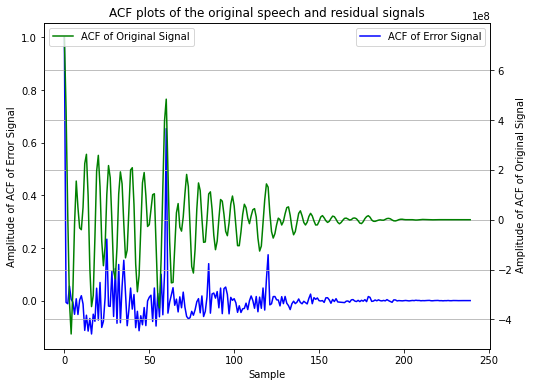

In [116]:
ax = plt.gca()
ax.plot(np.arange(e.shape[0]),autocorr(e),'b', label='ACF of Error Signal')
# ax = plt.gca()
ax.set_xlabel('Sample')
ax.set_ylabel('Amplitude of ACF of Error Signal')
ax2=ax.twinx()

ax2.plot(np.arange(s_n.shape[0]),autocorr(s_n),'g', label = 'ACF of Original Signal')
ax2.set_ylabel(' Amplitude of ACF of Original Signal')
plt.grid('on')
ax.legend(loc=0)
ax2.legend(loc=2)
plt.title('ACF plots of the original speech and residual signals')
fig = plt.gcf()
fig.set_size_inches(8, 6)
print('Estimated F0 using ACF: {} Hz, \n using magnitude Spectrum of error signal: {} Hz\n\n'.format(1/((np.argmax(autocorr(e)[1:])+1)/Fs), freq[np.argmax(mag_E_k[:25])]))

Observations:
- If we observe the magnitude spectrum of error residual signal we can see that the formant shaping is almost removed.
- Only harmonics are remaining in the the magnitude spectrum of error signal.
- dB Magnitude is relatively less than original signal because we have divided the error signal with G to get a unit energy signal.
- Fundamental frequency F0 found using harmonics plot is 132 Hz.
- Now in ACF plot of error residual signal we can again see that the high values of ACF that occured due to Formant shaping is now reduced and peaks at harmonics locations is remaining.
- As the k increases values of r[k] is decreasing drastically as the autocorrelation between far values is very less unless they are harmonics. This property is used in Harmonic product spectrum (HPS) method to determine the Fundamental frequency F0.
- Again the difference in the magnitude of amplitude can be explained by the effect of dividing by G.
- If the sound were unvoiced instead of a voiced vowels, then we would not have seen the peaks in the ACF but all the values in error signal ACF would have been close to zero.
- For finding the fundamental frequency from ACF plot of Residual error signal we found the peak of first peak after zero and calculated the time corresponding to that value. Then that time is fundamental time period and similarly fundamental frequency can be found by inverting the time period.
- Pitch period is found to be at F0 = 133 Hz by using ACF of error residual signal and this frequency is used further to reconstruct the original signal.

##7) Reconstruction

### Ideal Impulse Train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


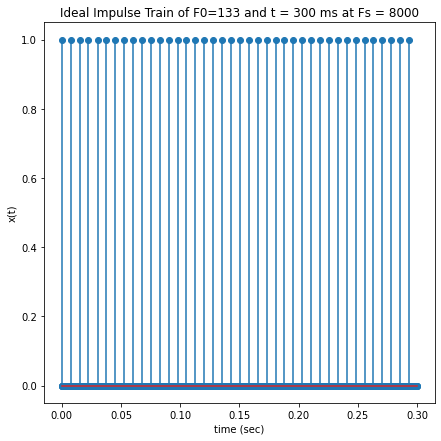

In [117]:
# Ideal Impulse Train:
# Defining function to Find the samples x[n]
def I_train(Fs, F0, delta_t, sec):
  # for x sec, Number of samples = x *Fs
  x_n = np.zeros(int(sec*Fs))
  # find out strides and N
  st,N = stride(F0,Fs,delta_t)
  # Updating x_n:
  i=0
  while(i+N < x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  if(i<x_n.shape[0]):
     x_n[i:] = st[:x_n.shape[0]-i]
  
  return x_n


from fractions import Fraction
# Define a function to return the samples and narrow triangular approximation 
# of impulse train
def stride(F0, Fs, delta_t):
  # F0: Fundamental frequency, Fs: Sampling Frequency, delta_t: Width of triangle
  # T0: Fundamental Time period
  T0 = 1/F0
  # Ts: Sampling Time period
  Ts = 1/Fs
  # N: Time period of triangular pulse with respect to Fs
  N = Fraction(Fs,F0).numerator
  # Strides in in (0: N)
  st = np.zeros(N)
  # Defining samples n
  n = np.arange(0,N)
  # time t = nTs
  t = Ts * n
  # k for iteration over iterations
  k=0
  for i in t:
    # cth cycle of signlal with F0
    c= i//T0
    # j time in that time period
    j = i-c*T0
    # Updating strides as triangular wave
    if( j< delta_t/2):
      st[k] =1
    elif(j > (T0-delta_t/2)):
      st[k] = 1
    k = k+ 1
  # Returing strides and N
  return st, N

# x[n] 
# F0 = 133
F0 = 133
# Fs = 8000
Fs = 8000
# Finding the samples x[n]
# for 0.3 sec
x_n = np.zeros(int(0.3*Fs))
# delta_t = 1/Fs
x_n = I_train(Fs, F0, 1/Fs, 0.3)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
#x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n/Fs
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.title('Ideal Impulse Train of F0={} and t = {} ms at Fs = {}'.format(F0,300,Fs))
plt.show()


### Applying 10th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=133, p=10')

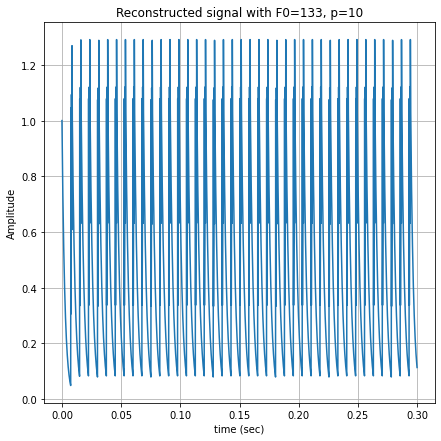

In [118]:
# Output with 10th order filter and G
a_10 = LP_coef[4]
G_10 = np.sqrt(Errors[10])


E_x_n = np.sqrt(np.sum(x_n**2))
u_n = x_n
s_hat = np.zeros(u_n.shape)
for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_10.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_10[k-1]*u_n[n-k]
# s_hat[n] *= G_10

# De-emphasis:
# Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,10))

In [119]:
# Import y[n] as wav file to hear to it
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
write('Reconstructed_135_10.wav', 8000, scaled)


###Applying 6th order Filter


Text(0.5, 1.0, 'Reconstructed signal with F0=133, p=6')

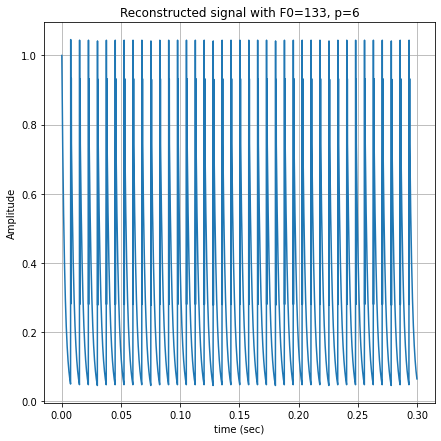

In [120]:
# Output with 6th order filter and G
a_6 = LP_coef[2]
G_6 = np.sqrt(Errors[6])

u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))

for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_6.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_6[k-1]*u_n[n-k]

# De-emphasis:
# Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,6))

In [121]:
# Import y[n] as wav file to hear to it
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
write('Reconstructed_135_6.wav', 8000, scaled)


Here, the \a\ sound is reconstructed using 10th order and 6th order LP coefficients and an Ideal impulse train of 133 Hz Frequency. The synthesized sound was then demphasized with a one pole filter and converted to sound with 8000 kHz sampling frequency. 

After listening to the both the sounds it is observed that sound synthesized using 10th order LP coefficients sounds more like /a/ than that of 6th order. The synthesized sound differes from the original sound but we can figure out that vowel /a/ is spoken. Perception of the pitch of the original and synthesized sound was very similar however, synthesized sound sounds more like a monotone or robotic voice.

Now we will observe the effect of change of frequency by changing the frequency from 133 Hz to 120 Hz

### Ideal Impulse Train of F0=120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


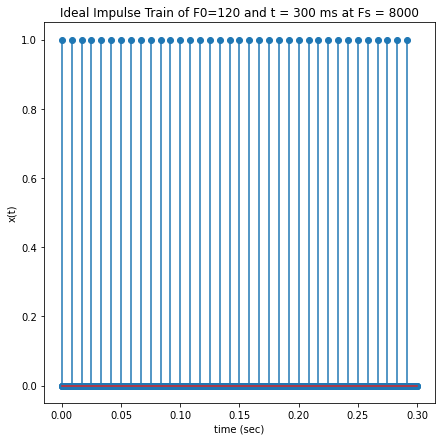

In [122]:
# Ideal Impulse Train:
# Defining function to Find the samples x[n]
def I_train(Fs, F0, delta_t, sec):
  # for x sec, Number of samples = x *Fs
  x_n = np.zeros(int(sec*Fs))
  # find out strides and N
  st,N = stride(F0,Fs,delta_t)
  # Updating x_n:
  i=0
  while(i+N < x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  if(i<x_n.shape[0]):
     x_n[i:] = st[:x_n.shape[0]-i]
  
  return x_n


from fractions import Fraction
# Define a function to return the samples and narrow triangular approximation 
# of impulse train
def stride(F0, Fs, delta_t):
  # F0: Fundamental frequency, Fs: Sampling Frequency, delta_t: Width of triangle
  # T0: Fundamental Time period
  T0 = 1/F0
  # Ts: Sampling Time period
  Ts = 1/Fs
  # N: Time period of triangular pulse with respect to Fs
  N = Fraction(Fs,F0).numerator
  # Strides in in (0: N)
  st = np.zeros(N)
  # Defining samples n
  n = np.arange(0,N)
  # time t = nTs
  t = Ts * n
  # k for iteration over iterations
  k=0
  for i in t:
    # cth cycle of signlal with F0
    c= i//T0
    # j time in that time period
    j = i-c*T0
    # Updating strides as triangular wave
    if( j< delta_t/2):
      st[k] =1
    elif(j > (T0-delta_t/2)):
      st[k] = 1
    k = k+ 1
  # Returing strides and N
  return st, N

# x[n] 
# F0 = 120
F0 = 120
# Fs = 8000
Fs = 8000
# Finding the samples x[n]
# for 0.3 sec
x_n = np.zeros(int(0.3*Fs))
# delta_t = 1/Fs
x_n = I_train(Fs, F0, 1/Fs, 0.3)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
#x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n/Fs
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.title('Ideal Impulse Train of F0={} and t = {} ms at Fs = {}'.format(F0,300,Fs))
plt.show()

### Applying 10th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=120, p=10')

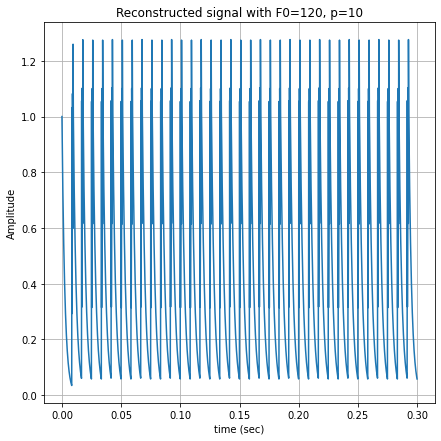

In [123]:
# Output with 10th order filter and G
a_10 = LP_coef[4]
G_10 = np.sqrt(Errors[10])
u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))

for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_10.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_10[k-1]*u_n[n-k]
# s_hat[n] *= G_10

# De-emphasis:
# Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,10))

In [124]:
# Import y[n] as wav file to hear to it
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
write('Reconstructed_120_10.wav', 8000, scaled)


### Applying 4th order filter

Text(0.5, 1.0, 'Reconstructed signal with F0=120, p=4')

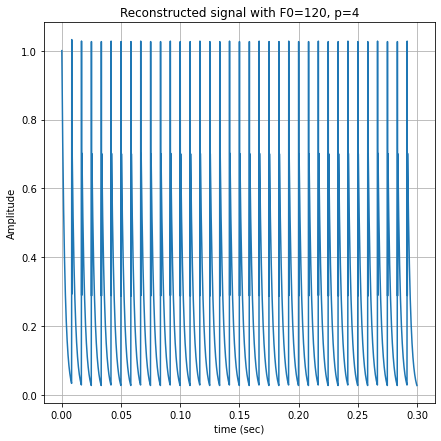

In [125]:
# Output with 10th order filter and G
a_10 = LP_coef[1]
G_10 = np.sqrt(Errors[4])
u_n = x_n
s_hat = np.zeros(u_n.shape)
E_x_n = np.sqrt(np.sum(x_n**2))
for n in range(u_n.shape[0]):
  s_hat[n] = u_n[n]
  for k in range(1,a_10.shape[0]):
    if (n-k>0):
      s_hat[n] -= a_10[k-1]*u_n[n-k]
# s_hat[n] *= G_10

# De-emphasis:
# Difference Equation: 
s_hat_d = np.zeros(s_hat.shape)
s_hat_d[0] = s_hat[0]
for i in range(1,s_hat.shape[0]): 
  s_hat_d[i] = s_hat[i]+0.95*s_hat_d[i-1]

# View the waveform:
n = np.arange(s_hat.shape[0])/Fs
plt.plot(n, s_hat_d)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Reconstructed signal with F0={}, p={}'.format(F0,4))

In [126]:
# Import y[n] as wav file to hear to it
scaled = np.int16(s_hat_d/s_hat.max() * 32767)
write('Reconstructed_120_4.wav', 8000, scaled)


Similar effect as F0 = 133 Hz is also observed here while listening to the synthesized sounds. Sound synthesized using 10th order LP coefficients sounds more like the vowel /a/ than the sound synthesized using 4th order LP coefficients. 

We can observe the change in the pitch of the sound by listening to the synthesized sound.

Similar sounding as monotone or robotic sound is observed in this case also on listening to the synthesized sound